In [2]:
pip install transformers datasets torch scikit-learn seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss


In [4]:
# Load dataset
file_path = "Downloads/AI.csv"  # Update with your file path
df = pd.read_csv(file_path)

In [5]:
# Check dataset information
df.info()

# Check for missing values
print(df.isnull().sum())

# Display some sample questions and answers
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  503 non-null    object
 1   Answer    503 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB
Question    0
Answer      0
dtype: int64


,Question,Answer
252,What is the properties of A* search?,"""A* search is complete"
398,What does the syntax of first-order logic does?,"""It adds terms to represent objects"
155,What happens in a structured representation?,Objects and their various and varying relation...
216,"""If A is a child node of B","what B is of A?"""
330,What are the examples of stochastic partial ob...,"""Card games such as bridge"


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


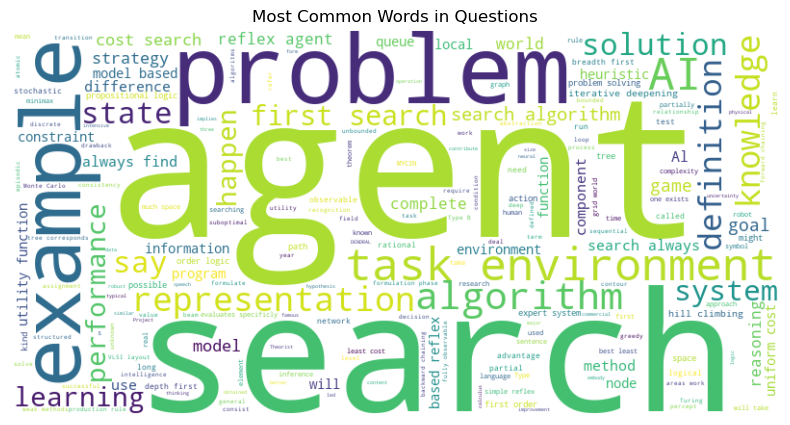

In [7]:
text = ' '.join(df['Question'])  # Combine all questions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Questions")
plt.show()


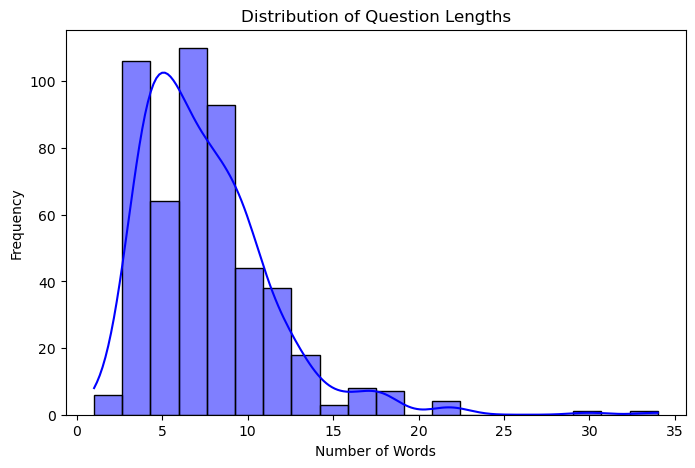

In [8]:
df['question_length'] = df['Question'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['question_length'], bins=20, kde=True, color='blue')
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

C:\Users\preet\AppData\Local\Temp\ipykernel_8768\2962797403.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=word_df, palette='viridis')


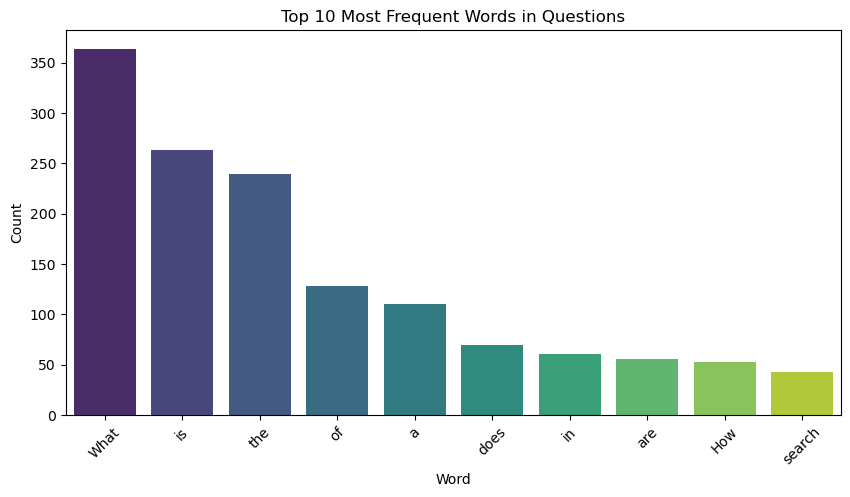

In [9]:
from collections import Counter
import pandas as pd

# Tokenize words
words = ' '.join(df['Question']).split()
word_counts = Counter(words)
common_words = word_counts.most_common(10)  # Top 10 words

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Count', data=word_df, palette='viridis')
plt.title("Top 10 Most Frequent Words in Questions")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Vectorize questions using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Question'])

# Function to get the best-matching answer
def get_answer(user_question):
    user_vector = vectorizer.transform([user_question])
    
    # Compute similarity
    similarities = cosine_similarity(user_vector, X)
    best_match_index = np.argmax(similarities)
    
    return df.iloc[best_match_index]['Answer']


TF-IDF + Cosine Similarity Accuracy: 0.9860834990059643


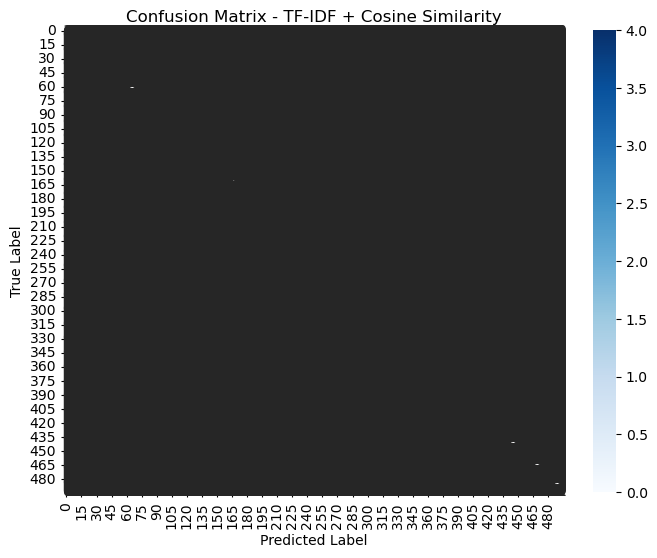

Classification Report - TF-IDF + Cosine Similarity:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
y_true = []
y_pred = []

for i in range(len(df)):
    question = df.iloc[i]['Question']
    actual_answer = df.iloc[i]['Answer']
    predicted_answer = get_answer(question)
    
    y_true.append(actual_answer)
    y_pred.append(predicted_answer)

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the actual labels (y_true)
label_encoder.fit(y_true)

# Now you can transform both the true labels and predicted labels
y_true_labels = [label_encoder.transform([a])[0] for a in y_true]
y_pred_labels = [label_encoder.transform([a])[0] for a in y_pred]

# Compute accuracy or other metrics as needed


# Convert text labels into numerical labels
y_true_labels = [label_encoder.transform([a])[0] for a in y_true]
y_pred_labels = [label_encoder.transform([a])[0] for a in y_pred]

# Compute Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("TF-IDF + Cosine Similarity Accuracy:", accuracy)

# Compute Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - TF-IDF + Cosine Similarity")
plt.show()

# Print Classification Report
print("Classification Report - TF-IDF + Cosine Similarity:\n", classification_report(y_true_labels, y_pred_labels))


In [ ]:
def chatbot_response(user_question):
    model.eval()
    encoded_input = tokenizer(user_question, padding="max_length", truncation=True, max_length=128, return_tensors="pt").to(device)
    
    with torch.no_grad():
        outputs = model(**encoded_input)
        predicted_label = torch.argmax(outputs.logits, dim=1).item()
    
    return label_encoder.inverse_transform([predicted_label])[0]

while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye! 👋")
        break
    print("Chatbot:", chatbot_response(user_input))
